### BitCoin Prediction Project
Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. 
- train your dataset using a few linear regression models. If the model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Use the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train the model on the entire dataset using the best parameters and predict the market price for the test_set.

# 1. Importing, exploring and treating the training and test datasets

In [143]:
import pandas as pd
train = pd.read_csv('bitcoin_dataset(1).csv')
test = pd.read_csv('test_set(1).csv')

### a) View first 5 rows of training and test datasets to get an overview of data outlook

In [144]:
train.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [145]:
test.head()

,Date,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/1/2018 0:00,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
1,2/2/2018 0:00,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2,2/3/2018 0:00,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
3,2/4/2018 0:00,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
4,2/5/2018 0:00,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


### b) View dimensions of the training and test datsets

In [146]:
test.shape

(14, 23)

In [147]:
train.shape

(2906, 24)

### c) View basic descriptive statistics of the training dataset

In [148]:
train.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


### d) Check and treat missing values

In [149]:
train.isnull().values.any()

True

In [150]:
train.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [151]:
train_2 = train.ffill().bfill()

In [152]:
train_2.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

### e) Plot correlation matrix to view relation between independent variables 

In [153]:
train.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.392474,0.999784,0.868813,0.674507,0.544033,-0.076400,0.544125,0.275250,0.920876,...,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
btc_total_bitcoins,0.392474,1.000000,0.384606,0.285815,0.779705,0.851554,0.274925,0.831414,0.668119,0.488668,...,-0.079864,0.372758,0.820595,0.832865,0.782652,0.814721,0.800405,0.290952,0.211814,0.387920
btc_market_cap,0.999784,0.384606,1.000000,0.869256,0.672918,0.541357,-0.080745,0.541746,0.271950,0.922108,...,-0.012925,0.805635,0.660761,0.566896,0.678136,0.555714,0.564836,0.112418,0.051361,0.968534
btc_trade_volume,0.868813,0.285815,0.869256,1.000000,0.521061,0.416060,-0.068798,0.430265,0.216617,0.758304,...,-0.009456,0.691630,0.539430,0.453644,0.525484,0.441964,0.449660,0.097722,0.056079,0.896016
btc_blocks_size,0.674507,0.779705,0.672918,0.521061,1.000000,0.955978,0.050864,0.946702,0.511763,0.826119,...,-0.030112,0.443102,0.966650,0.950189,0.999785,0.951959,0.961206,0.251049,0.152055,0.672394
btc_avg_block_size,0.544033,0.851554,0.541357,0.416060,0.955978,1.000000,0.147514,0.977887,0.555426,0.687581,...,-0.036717,0.335611,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090
btc_n_orphaned_blocks,-0.076400,0.274925,-0.080745,-0.068798,0.050864,0.147514,1.000000,0.114178,0.071636,-0.092103,...,-0.015803,0.009497,0.122447,0.108167,0.054493,0.115909,0.073792,-0.006275,0.018300,-0.080944
btc_n_transactions_per_block,0.544125,0.831414,0.541746,0.430265,0.946702,0.977887,0.114178,1.000000,0.560052,0.670598,...,-0.036007,0.318210,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285
btc_median_confirmation_time,0.275250,0.668119,0.271950,0.216617,0.511763,0.555426,0.071636,0.560052,1.000000,0.346172,...,-0.055222,0.178982,0.514264,0.545911,0.513363,0.510871,0.535190,0.308597,0.217121,0.281442
btc_hash_rate,0.920876,0.488668,0.922108,0.758304,0.826119,0.687581,-0.092103,0.670598,0.346172,1.000000,...,-0.015868,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864


### f) Check data types and for categorical variables

In [154]:
train_2.dtypes

Date                                                    object
btc_market_price                                       float64
btc_total_bitcoins                                     float64
btc_market_cap                                         float64
btc_trade_volume                                       float64
btc_blocks_size                                        float64
btc_avg_block_size                                     float64
btc_n_orphaned_blocks                                    int64
btc_n_transactions_per_block                           float64
btc_median_confirmation_time                           float64
btc_hash_rate                                          float64
btc_difficulty                                         float64
btc_miners_revenue                                     float64
btc_transaction_fees                                   float64
btc_cost_per_transaction_percent                       float64
btc_cost_per_transaction                               

### g) Splitting X and Y variables for training and testing datasets

In [155]:
x_data = train_2.drop(['Date', 'btc_market_price'], axis=1)
x_data.head()

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [156]:
y_data = train_2['btc_market_price']
y_data.describe()

count     2906.000000
mean       839.104218
std       2304.972497
min          0.000000
25%          6.653465
50%        235.130000
75%        594.191164
max      19498.683330
Name: btc_market_price, dtype: float64

In [157]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=0)

### h) Scaling training and test independent variables

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 2. Running KNN regression

In [159]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
param_grid = {'n_neighbors':[1, 2, 3, 7, 15, 55]}

grid_search = GridSearchCV(knn, param_grid, cv = 5, return_train_score=True)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 7, 15, 55]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [160]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'n_neighbors': 2}
Best score 0.99


In [161]:
results = pd.DataFrame(grid_search.cv_results_)
results 

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.003811,0.011229,0.990873,1.000000,1,{'n_neighbors': 1},4,0.993155,1.000000,0.982609,...,0.995725,1.000000,0.992932,1.000000,0.989942,1.000000,1.169559e-03,8.539010e-03,0.004521,0.000000
1,0.001999,0.006016,0.993785,0.997818,2,{'n_neighbors': 2},1,0.992712,0.997786,0.991699,...,0.994939,0.997240,0.997177,0.997830,0.992393,0.997831,1.256681e-05,4.768372e-07,0.002014,0.000368
2,0.002005,0.006416,0.993699,0.996928,3,{'n_neighbors': 3},2,0.990656,0.997264,0.992236,...,0.996009,0.996240,0.997783,0.996673,0.991806,0.997020,1.712636e-06,4.800026e-04,0.002721,0.000430
3,0.002005,0.007019,0.992952,0.994527,7,{'n_neighbors': 7},3,0.990107,0.994367,0.992589,...,0.993693,0.994479,0.996362,0.994252,0.992008,0.994479,9.122432e-07,1.093611e-06,0.002064,0.000279
4,0.002406,0.008222,0.988448,0.990339,15,{'n_neighbors': 15},5,0.982940,0.991078,0.987932,...,0.989880,0.989584,0.995067,0.990080,0.986414,0.990191,4.914978e-04,4.018788e-04,0.004016,0.000526
5,0.002605,0.013042,0.934318,0.936492,55,{'n_neighbors': 55},6,0.926814,0.949258,0.947733,...,0.922085,0.931824,0.942744,0.931118,0.932209,0.942578,4.928247e-04,6.441367e-04,0.009608,0.008103


In [163]:
# running KNN with best parameters
knnreg = KNeighborsRegressor(n_neighbors = 2).fit(x_train_scaled, y_train)
train_score = knnreg.score(x_train_scaled, y_train)
test_score = knnreg.score(x_test_scaled, y_test)
print ("K is 2. \n" + "Training R^2 = " + str(train_score) + ". \n" + "Test R^2 = " + str(test_score))

K is 2. 
Training R^2 = 0.99793772896. 
Test R^2 = 0.993331600288


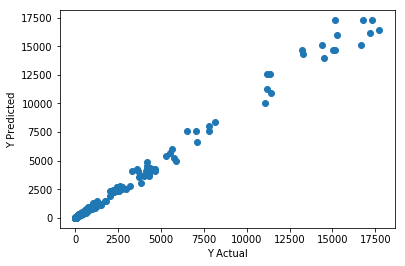

In [166]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(y_test, knnreg.predict(x_test_scaled))
plt.show()

# 3. Running linear regression

In [167]:
from sklearn.linear_model import LinearRegression
import numpy as np

lr = LinearRegression()

scores = cross_val_score(lr, x_train_scaled, y_train, cv = 5)
print(scores)
print(np.mean(scores))

lr.fit(x_train_scaled, y_train)
print("R squared Training : " + str(lr.score(x_train_scaled , y_train)))
print("R squared Test : " + str(lr.score(x_test_scaled , y_test)))


[ 0.99993915  0.99995689  0.99996456  0.99996229  0.99995041]
0.999954660351
R squared Training : 0.99995764035
R squared Test : 0.999958082859


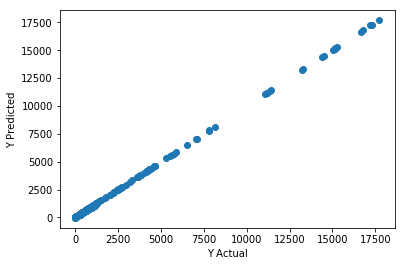

In [168]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(y_test, lr.predict(x_test_scaled))
plt.show()

# 4. Running LASSO regression

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 10000)
param_grid = {'alpha':[0.001, 1, 5, 10, 20, 100]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5, return_train_score=True)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 1, 5, 10, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [170]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.001}
Best score 1.00


In [171]:
results = pd.DataFrame(grid_search.cv_results_)
results 

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.003407,0.000600,0.999926,0.999932,0.001,{'alpha': 0.001},1,0.999897,0.999936,0.999928,...,0.999945,0.999927,0.999939,0.999929,0.999921,0.999933,0.000494,0.000490,0.000017,0.000003
1,0.002406,0.000602,0.999882,0.999889,1,{'alpha': 1},2,0.999866,0.999899,0.999907,...,0.999853,0.999881,0.999894,0.999885,0.999889,0.999890,0.000491,0.000491,0.000019,0.000006
2,0.001805,0.000601,0.999470,0.999479,5,{'alpha': 5},3,0.999530,0.999541,0.999587,...,0.999287,0.999442,0.999505,0.999465,0.999442,0.999497,0.000401,0.000802,0.000103,0.000036
3,0.001606,0.000201,0.998212,0.998232,10,{'alpha': 10},4,0.998482,0.998464,0.998410,...,0.997754,0.998083,0.998227,0.998173,0.998185,0.998315,0.000490,0.000402,0.000254,0.000140
4,0.003206,0.000401,0.993152,0.993214,20,{'alpha': 20},5,0.994217,0.994127,0.993411,...,0.991878,0.992619,0.992961,0.992981,0.993291,0.993563,0.000400,0.000491,0.000759,0.000557
5,0.004010,0.000602,0.834457,0.835088,100,{'alpha': 100},6,0.862540,0.858096,0.831848,...,0.809784,0.818982,0.826783,0.829831,0.841345,0.843489,0.001099,0.000491,0.017385,0.014056


In [173]:
# running lasso with best parameters
lasso = Lasso(max_iter = 100000, alpha = 0.001)
lasso.fit(x_train_scaled, y_train)
train_score_lasso = (lasso.score(x_train_scaled, y_train))
test_score_lasso = (lasso.score(x_test_scaled, y_test))
print ("Alpha is 0.001 \n" + "Training R^2 = " + str(train_score_lasso) + ". \n" + "Test R^2 = " + str(test_score_lasso))

Alpha is 0.001 
Training R^2 = 0.999931542471. 
Test R^2 = 0.999929295647


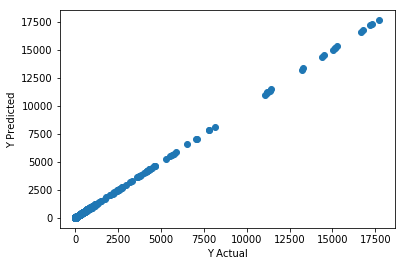

In [184]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(y_test, lasso.predict(x_test_scaled))
plt.show()

# 5. Running Ridge regression

In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5, return_train_score=True)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 1, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [179]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.01}
Best score 1.00


In [183]:
results = pd.DataFrame(grid_search.cv_results_)
results 

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001404,0.000401,0.999894,0.999925,0.01,{'alpha': 0.01},1,0.999903,0.999931,0.999819,...,0.999916,0.999921,0.999940,0.999925,0.999890,0.999927,4.882585e-04,0.000491,0.000041,0.000004
1,0.001003,0.000401,0.994798,0.995678,1,{'alpha': 1},2,0.995356,0.995811,0.993090,...,0.996387,0.995319,0.995662,0.995554,0.993493,0.995830,4.862804e-07,0.000491,0.001281,0.000211
2,0.001806,0.000200,0.985865,0.987038,5,{'alpha': 5},3,0.984482,0.987626,0.988709,...,0.986589,0.985875,0.987732,0.986719,0.981804,0.987603,4.016177e-04,0.000401,0.002469,0.000668
3,0.001203,0.000602,0.976918,0.978295,10,{'alpha': 10},4,0.974519,0.979705,0.984385,...,0.975444,0.976701,0.979467,0.977783,0.970761,0.979322,4.013785e-04,0.000492,0.004649,0.001091
4,0.001403,0.000000,0.810050,0.812690,100,{'alpha': 100},5,0.812390,0.824724,0.831778,...,0.795118,0.808089,0.810857,0.809306,0.800081,0.820011,4.920933e-04,0.000000,0.012655,0.008490


In [182]:
ridge = Ridge(alpha = 0.001)
ridge.fit(x_train_scaled, y_train)
train_score_ridge = (ridge.score(x_train_scaled, y_train))
test_score_ridge = (ridge.score(x_test_scaled, y_test))

print ("Alpha is 0.001 \n" + "Training R^2 = " + str(train_score_ridge) + ". \n" + "Test R^2 = " + str(test_score_ridge))

Alpha is 0.001 
Training R^2 = 0.999957269965. 
Test R^2 = 0.999957196175


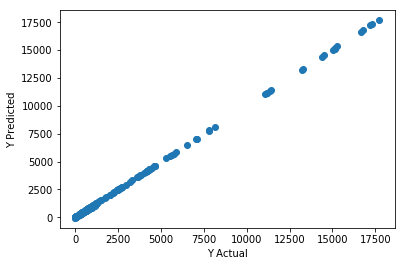

In [185]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(y_test, ridge.predict(x_test_scaled))
plt.show()

# 6. Running Polynomial regression

In [186]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly= poly.transform(x_test_scaled)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

scores_poly = cross_val_score(lr, x_train_poly, y_train, cv = 5)
print(scores_poly)
print(np.mean(scores_poly))

lr.fit(x_train_poly, y_train)
print("R squared Training : " + str(lr.score(x_train_poly , y_train)))
print("R squared Test : " + str(lr.score(x_test_poly , y_test)))

[ 0.99998179  0.99985131  0.99998667  0.99999039  0.9987457 ]
0.999711172332
R squared Training : 0.999997429144
R squared Test : 0.999994235593


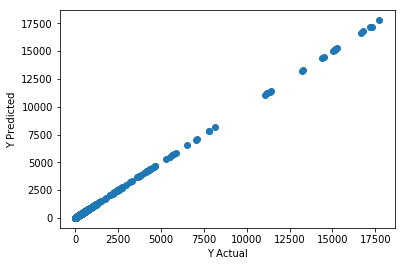

In [187]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(y_test, lr.predict(x_test_poly))
plt.show()

# 7. Running SVM (linear)

In [188]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear')
param_grid = {'C':[0.1, 1, 10, 50, 100, 150, 1000, 1500], 
              'epsilon': [0.1, 1, 10]}

grid_search = GridSearchCV(svr, param_grid, cv = 10, return_train_score=True)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 50, 100, 150, 1000, 1500], 'epsilon': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [189]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 1500, 'epsilon': 0.1}
Best score 1.00


In [190]:
results = pd.DataFrame(grid_search.cv_results_)
results 

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_epsilon,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.140062,0.007325,-0.023225,-0.022822,0.1,0.1,"{'C': 0.1, 'epsilon': 0.1}",23,-0.021364,-0.022925,...,-0.010217,-0.023513,-0.007404,-0.023910,-0.028394,-0.022373,0.014172,0.000456,0.016198,0.001144
1,0.135864,0.007423,-0.023211,-0.022805,0.1,1,"{'C': 0.1, 'epsilon': 1}",22,-0.021303,-0.022877,...,-0.010209,-0.023504,-0.007432,-0.023934,-0.028361,-0.022337,0.002969,0.000489,0.016184,0.001163
2,0.135450,0.007219,-0.023309,-0.022910,0.1,10,"{'C': 0.1, 'epsilon': 10}",24,-0.021293,-0.022867,...,-0.010357,-0.023677,-0.007332,-0.023852,-0.028297,-0.022267,0.022030,0.000401,0.016230,0.001129
3,0.126026,0.007122,0.123148,0.121729,1,0.1,"{'C': 1, 'epsilon': 0.1}",21,0.141257,0.120582,...,0.124251,0.122971,0.155467,0.120518,0.105405,0.123495,0.002057,0.000300,0.018996,0.001696
4,0.129234,0.007226,0.123150,0.121725,1,1,"{'C': 1, 'epsilon': 1}",20,0.141316,0.120629,...,0.124417,0.123163,0.155637,0.120657,0.105377,0.123465,0.017144,0.000405,0.019064,0.001631
5,0.111690,0.006329,0.123415,0.121950,1,10,"{'C': 1, 'epsilon': 10}",19,0.141352,0.120679,...,0.123794,0.122448,0.155164,0.120320,0.105575,0.123639,0.001356,0.000636,0.018422,0.001235
6,0.131042,0.007522,0.452701,0.451721,10,0.1,"{'C': 10, 'epsilon': 0.1}",17,0.465536,0.453716,...,0.448895,0.453129,0.473723,0.456058,0.425862,0.453056,0.009932,0.001206,0.018753,0.004767
7,0.129241,0.007122,0.452738,0.451751,10,1,"{'C': 10, 'epsilon': 1}",16,0.465838,0.454013,...,0.448975,0.453195,0.473592,0.455924,0.425711,0.452896,0.020858,0.000300,0.018792,0.004745
8,0.099069,0.005417,0.451426,0.450467,10,10,"{'C': 10, 'epsilon': 10}",18,0.464301,0.452633,...,0.447697,0.451851,0.472163,0.454765,0.424361,0.451421,0.001667,0.000483,0.018872,0.004814
9,0.141175,0.007422,0.867331,0.867945,50,0.1,"{'C': 50, 'epsilon': 0.1}",13,0.860323,0.873283,...,0.865820,0.870021,0.868831,0.873086,0.845120,0.871618,0.005307,0.000496,0.015015,0.006682


In [191]:
from sklearn.svm import SVR

svm = SVR(C = 1500, epsilon = 0.1, kernel = 'linear')
svm.fit(x_train_scaled, y_train)
train_score_svm = (svm.score(x_train_scaled, y_train))
test_score_svm = (svm.score(x_test_scaled, y_test))

print ("C is 1500 \n" + 
       "Epsilon is 0.1 \n" + 
       "Training R^2 = " + str(train_score_svm) + ". \n" + "Test R^2 = " + str(test_score_svm))

C is 1500 
Epsilon is 0.1 
Training R^2 = 0.999477118096. 
Test R^2 = 0.999467071489


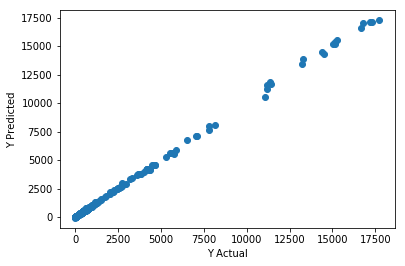

In [192]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(y_test, svm.predict(x_test_scaled))
plt.show()

# 8. Running SVM (kernel 'rbf')

In [193]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')
param_grid = {'C':[0.1, 1, 10, 50, 100, 150, 1000, 1500], 
              'epsilon': [0.1, 1, 10]}

grid_search = GridSearchCV(svr, param_grid, cv = 10, return_train_score=True)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 50, 100, 150, 1000, 1500], 'epsilon': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [194]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 1500, 'epsilon': 10}
Best score 0.98


In [195]:
results = pd.DataFrame(grid_search.cv_results_)
results 

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_epsilon,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.203939,0.014338,-0.066007,-0.064779,0.1,0.1,"{'C': 0.1, 'epsilon': 0.1}",24,-0.070681,-0.064406,...,-0.048780,-0.066235,-0.057414,-0.065635,-0.066507,-0.064750,0.011602,0.002289,0.016273,0.001499
1,0.203845,0.013439,-0.065991,-0.064767,0.1,1,"{'C': 0.1, 'epsilon': 1}",23,-0.070642,-0.064375,...,-0.048797,-0.066256,-0.057293,-0.065532,-0.066531,-0.064776,0.010955,0.000488,0.016273,0.001499
2,0.195122,0.013138,-0.065763,-0.064532,0.1,10,"{'C': 0.1, 'epsilon': 10}",22,-0.070354,-0.064149,...,-0.048484,-0.065887,-0.056895,-0.065192,-0.066300,-0.064531,0.001427,0.000310,0.016445,0.001330
3,0.205139,0.014341,-0.034920,-0.034398,1,0.1,"{'C': 1, 'epsilon': 0.1}",20,-0.033812,-0.034414,...,-0.021186,-0.035188,-0.020348,-0.035338,-0.038956,-0.034057,0.009854,0.002375,0.016319,0.001137
4,0.219988,0.014341,-0.034902,-0.034379,1,1,"{'C': 1, 'epsilon': 1}",19,-0.033766,-0.034377,...,-0.021148,-0.035145,-0.020404,-0.035386,-0.038927,-0.034026,0.020830,0.001017,0.016284,0.001170
5,0.212363,0.015239,-0.035185,-0.034658,1,10,"{'C': 1, 'epsilon': 10}",21,-0.034159,-0.034687,...,-0.021537,-0.035596,-0.020700,-0.035637,-0.039108,-0.034219,0.013637,0.003773,0.016256,0.001202
6,0.192806,0.013737,0.101644,0.100085,10,0.1,"{'C': 10, 'epsilon': 0.1}",16,0.121151,0.099034,...,0.102060,0.100791,0.134143,0.098630,0.084915,0.101737,0.002012,0.000460,0.019177,0.001365
7,0.197926,0.013539,0.101605,0.100048,10,1,"{'C': 10, 'epsilon': 1}",17,0.121114,0.099009,...,0.101957,0.100673,0.134053,0.098561,0.084882,0.101702,0.017989,0.000675,0.019176,0.001362
8,0.172468,0.011131,0.101421,0.099878,10,10,"{'C': 10, 'epsilon': 10}",18,0.120392,0.098392,...,0.101982,0.100673,0.133830,0.098418,0.084446,0.101188,0.006624,0.000300,0.019199,0.001398
9,0.204484,0.014335,0.275944,0.274039,50,0.1,"{'C': 50, 'epsilon': 0.1}",13,0.296271,0.273048,...,0.271142,0.275580,0.310578,0.274117,0.249306,0.275668,0.021675,0.001512,0.020445,0.002312


In [196]:
from sklearn.svm import SVR

svm = SVR(C = 1500, epsilon = 10, kernel = 'rbf')
svm.fit(x_train_scaled, y_train)
train_score_rbf = (svm.score(x_train_scaled, y_train))
test_score_rbf = (svm.score(x_test_scaled, y_test))

print ("C is 1500 \n" + 
       "Epsilon is 10 \n" + 
       "Training R^2 = " + str(train_score_rbf) + ". \n" + "Test R^2 = " + str(test_score_rbf))

C is 1500 
Epsilon is 10 
Training R^2 = 0.981438962847. 
Test R^2 = 0.981050577056


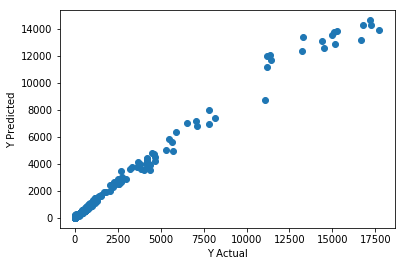

In [197]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(y_test, svm.predict(x_test_scaled))
plt.show()

# 9. Model Selection

##### R Squared is highest for Polynomial Regression (R^2 = 0.999994235593). Hence, we choose this model 

# 10. Preparing entire dataset for training with polynomial regression 

In [198]:
x_test = test.drop(['Date'], axis=1)
x_test.head()

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,2.603080e+12,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
1,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,2.603080e+12,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,2.603080e+12,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
3,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,2.603080e+12,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
4,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,2.603080e+12,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


In [199]:
x_test.isnull().values.any()

False

In [200]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_data_scaled = scaler.fit_transform(x_data)
x_test_scaled = scaler.transform(x_test)

# 11. Running final model to the provided test dataset

In [201]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

x_data_poly = poly.fit_transform(x_data_scaled)
x_test_poly= poly.transform(x_test_scaled)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_data_poly, y_data)
print("R squared Training : " + str(lr.score(x_data_poly , y_data)))

lr.predict(x_test_poly)

R squared Training : 0.999997800857


array([ 9093.77960965,  8901.84267193,  9094.07353795,  8434.75517899,
        6898.6092521 ,  7685.43805374,  8117.84055764,  8271.14477375,
        8568.56194868,  8354.16701477,  8372.16060413,  8848.01223308,
        8647.53244604,  9349.61785301])